In [26]:
using CSV
using PyPlot
const plt = PyPlot

[ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]


PyPlot

## Data
Downloaded from https://www.vliz.be/en/imis?module=dataset&dasid=3117.

In [78]:
datadir = "/home/ctroupin/data/EMODnet/Biology/dwca-esas-v1.3"
datafileevent = joinpath(datadir, "event.txt")
datafileoccur = joinpath(datadir, "occurrence.txt")
isfile(datafileevent) & isfile(datafileoccur)

true

In [80]:
function read_data_event(datafile::AbstractString)
    open(datafile, "r") do df
        firstline = readline(df)
        column_names = split(firstline, "\t")
        
        ncolumns = length(column_names)
        @info("Number of columns: $(ncolumns)")
        
        lon_column = findfirst(occursin.("decimalLongitude", column_names))
        lat_column = findfirst(occursin.("decimalLatitude", column_names))
        @info("Column index for longitude: $(lon_column); for latitude: $(lat_column)")
        
        lon = Float64[]
        lat = Float64[]
       
        for lines in readlines(df)
            linesplit = split(lines, "\t")
            
            if linesplit[2] == "subSample"
                push!(lon, parse(Float64, linesplit[lon_column]))
                push!(lat, parse(Float64,linesplit[lat_column]))
            end
        end
        
        
        return lon::Array{Float64}, lat::Array{Float64}
    end
end

read_data_event (generic function with 1 method)

In [81]:
@time lon, lat = read_data_event(datafileevent);

[ Info: Number of columns: 15
[ Info: Column index for longitude: 13; for latitude: 12


  3.405028 seconds (7.87 M allocations: 2.551 GiB, 16.36% gc time, 3.77% compilation time)


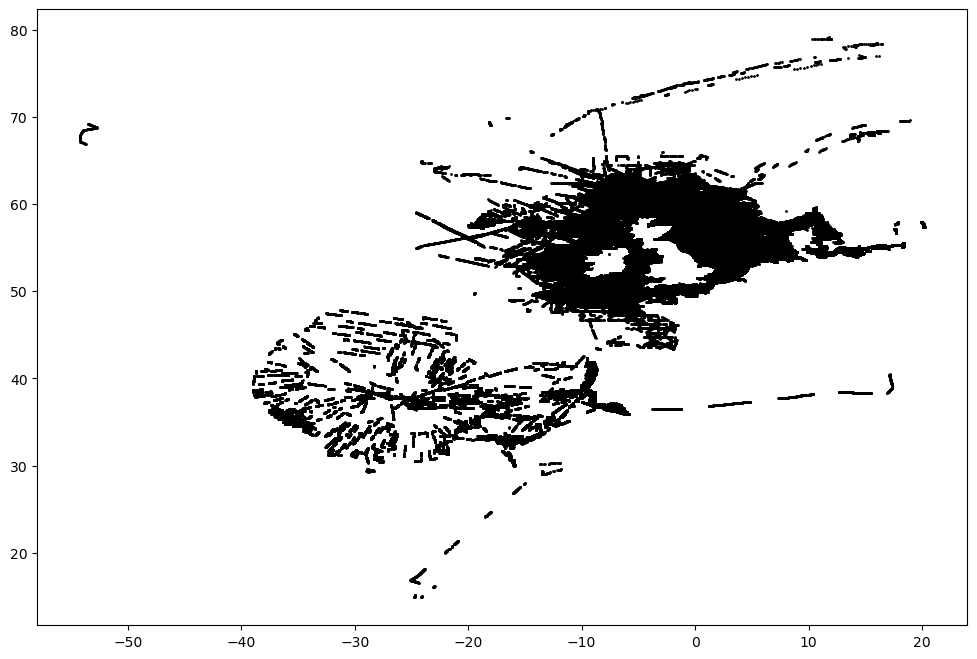

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fab8fd5d550>

In [83]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
plt.plot(lon, lat, "ko", ms=1)

In [95]:
function read_data_occurence(datafile::AbstractString)
    open(datafile, "r") do df
        firstline = readline(df)
        column_names = split(firstline, "\t")
        
        ncolumns = length(column_names)
        println(column_names)
        @info("Number of columns: $(ncolumns)")
        
        scientificName_column = findall(column_names .== "scientificName")
        eventID_column = findall(column_names .== "eventID")

        scientificName = String[]
        eventID = String[]
       
        for lines in readlines(df)
            linesplit = split(lines, "\t")
            
            push!(scientificName, linesplit[scientificName_column])
            push!(eventID, linesplit[eventID_column])
        end
        
        
        return scientificName, eventID
    end
end

read_data_occurence (generic function with 1 method)

In [96]:
scientificName, eventID = read_data_occurence(datafileoccur)

SubString{String}["id", "basisOfRecord", "occurrenceID", "occurrenceRemarks", "individualCount", "sex", "lifeStage", "behavior", "occurrenceStatus", "associatedTaxa", "eventID", "scientificNameID", "scientificName", "kingdom", "vernacularName"]


[ Info: Number of columns: 15


LoadError: MethodError: [0mCannot `convert` an object of type [92mVector{SubString{String}}[39m[0m to an object of type [91mString[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::PyCall.PyObject[39m) where T<:AbstractString
[0m[90m   @[39m [32mPyCall[39m [90m~/.julia/packages/PyCall/ilqDX/src/[39m[90m[4mconversions.jl:92[24m[39m
[0m  convert(::Type{String}, [91m::WeakRefStrings.WeakRefString[39m)
[0m[90m   @[39m [36mWeakRefStrings[39m [90m~/.julia/packages/WeakRefStrings/31nkb/src/[39m[90m[4mWeakRefStrings.jl:81[24m[39m
[0m  convert(::Type{String}, [91m::FilePathsBase.AbstractPath[39m)
[0m[90m   @[39m [32mFilePathsBase[39m [90m~/.julia/packages/FilePathsBase/9kSEl/src/[39m[90m[4mpath.jl:117[24m[39m
[0m  ...


In [92]:
scientificName

2687910-element Vector{String}:
 "urn:lsid:marinespecies.org:taxname:137138"
 "urn:lsid:marinespecies.org:taxname:1534784"
 "urn:lsid:marinespecies.org:taxname:137179"
 "urn:lsid:marinespecies.org:taxname:137179"
 "urn:lsid:marinespecies.org:taxname:137179"
 "urn:lsid:marinespecies.org:taxname:137179"
 "urn:lsid:marinespecies.org:taxname:137142"
 "urn:lsid:marinespecies.org:taxname:137142"
 "urn:lsid:marinespecies.org:taxname:137142"
 "urn:lsid:marinespecies.org:taxname:137166"
 "urn:lsid:marinespecies.org:taxname:148776"
 "urn:lsid:marinespecies.org:taxname:137146"
 "urn:lsid:marinespecies.org:taxname:137166"
 ⋮
 "urn:lsid:marinespecies.org:taxname:137133"
 "urn:lsid:marinespecies.org:taxname:148776"
 "urn:lsid:marinespecies.org:taxname:137133"
 "urn:lsid:marinespecies.org:taxname:137133"
 "urn:lsid:marinespecies.org:taxname:137142"
 "urn:lsid:marinespecies.org:taxname:137142"
 "urn:lsid:marinespecies.org:taxname:137138"
 "urn:lsid:marinespecies.org:taxname:137156"
 "urn:lsid:marinesp

In [93]:
aa = ["id", "basisOfRecord", "occurrenceID", "occurrenceRemarks", "individualCount", "sex", "lifeStage", "behavior", "occurrenceStatus", "associatedTaxa", "eventID", "scientificNameID", "scientificName", "kingdom", "vernacularName"]

15-element Vector{String}:
 "id"
 "basisOfRecord"
 "occurrenceID"
 "occurrenceRemarks"
 "individualCount"
 "sex"
 "lifeStage"
 "behavior"
 "occurrenceStatus"
 "associatedTaxa"
 "eventID"
 "scientificNameID"
 "scientificName"
 "kingdom"
 "vernacularName"

15-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0